In [1]:
import pandas as pd
import numpy as np
#pd.options.display.max_columns = None

In [2]:
np.__version__

'1.18.5'

In [3]:
# Citation Request:
#   This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 
#   Please include this citation if you plan to use this database:

#   [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001

#   Available at: [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
#                 [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt

# 1. Title: Bank Marketing (with social/economic context)

# 2. Sources
#    Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho) and Paulo Rita (ISCTE-IUL) @ 2014
   
# 3. Past Usage:

#   The full dataset (bank-additional-full.csv) was described and analyzed in:

#   S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014), doi:10.1016/j.dss.2014.03.001.
 
# 4. Relevant Information:

#    This dataset is based on "Bank Marketing" UCI dataset (please check the description at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).
#    The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: https://www.bportugal.pt/estatisticasweb.
#    This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns). 
#    Using the rminer package and R tool (http://cran.r-project.org/web/packages/rminer/), we found that the addition of the five new social and economic attributes (made available here) lead to substantial improvement in the prediction of a success, even when the duration of the call is not included. Note: the file can be read in R using: d=read.table("bank-additional-full.csv",header=TRUE,sep=";")
   
#    The zip file includes two datasets: 
#       1) bank-additional-full.csv with all examples, ordered by date (from May 2008 to November 2010).
#       2) bank-additional.csv with 10% of the examples (4119), randomly selected from bank-additional-full.csv.
#    The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).

#    The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

# 5. Number of Instances: 41188 for bank-additional-full.csv

# 6. Number of Attributes: 20 + output attribute.

# 7. Attribute information:

#    For more information, read [Moro et al., 2014].

#    Input variables:
#    # bank client data:
#    1 - age (numeric)
#    2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
#    3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
#    4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
#    5 - default: has credit in default? (categorical: "no","yes","unknown")
#    6 - housing: has housing loan? (categorical: "no","yes","unknown")
#    7 - loan: has personal loan? (categorical: "no","yes","unknown")
#    # related with the last contact of the current campaign:
#    8 - contact: contact communication type (categorical: "cellular","telephone") 
#    9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
#   10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
#   11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#    # other attributes:
#   12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
#   13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
#   14 - previous: number of contacts performed before this campaign and for this client (numeric)
#   15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
#    # social and economic context attributes
#   16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
#   17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
#   18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
#   19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
#   20 - nr.employed: number of employees - quarterly indicator (numeric)

#   Output variable (desired target):
#   21 - y - has the client subscribed a term deposit? (binary: "yes","no")

# 8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


In [4]:
df_cmb_master = pd.read_csv("bank-additional-full.csv", sep = ';')
df_cmb_master.shape

(41188, 21)

In [5]:
df_cmb_master.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df_cmb_master.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
df_cmb_master.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df_cmb_master.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [9]:
df_cmb_master['y'] = np.where(df_cmb_master['y'] == 'yes',1,0)
df_cmb_master['y'] = df_cmb_master['y'].astype(str)


# Check Missing Values

In [10]:
##Check Missing Values
df_cmb_master.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Impute Missing Values##

In [11]:
###Impute Missing Values##
col_list = list(df_cmb_master.columns)
col_list.remove('y')
for col in col_list:
    if df_cmb_master[[col]][col].dtype == 'object':
        df_cmb_master[[col]][col] = df_cmb_master[[col]][col].fillna((df_cmb_master[[col]][col].mode()))
    else:
        df_cmb_master[[col]][col] = df_cmb_master[[col]][col].fillna((df_cmb_master[[col]][col].mean()))

C:\Users\abhim\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\abhim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Impute Outliers####

In [12]:
####Impute Outliers####
# for col in col_list:
#     if df_cmb_master[[col]][col].dtype != 'object':
#         ul = df_cmb_master[[col]][col].mean() + (3 * df_cmb_master[[col]][col].std() )
#         ll = df_cmb_master[[col]][col].mean() + (3 * df_cmb_master[[col]][col].std() )
#         df_cmb_master[col] = np.where(df_cmb_master[col] > ul, ul, 
#                                      np.where(df_cmb_master[col] < ll,ll,df_cmb_master[col] ) )   

# Binning##

In [13]:
##Binning of Age##
bins = [0, 1, 5, 10, 25, 50, 100]
df_cmb_master['age'] = pd.cut(df_cmb_master['age'], bins)

df_cmb_master['age'] = df_cmb_master.age.astype(str)

In [14]:
df_cmb_master['age'].unique()

array(['(50, 100]', '(25, 50]', '(10, 25]'], dtype=object)

In [15]:
df_cmb_master.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(25, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(25, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Chisq Test for Independence

In [16]:
from scipy.stats import chisquare
import scipy.stats
from scipy.stats import chi2
#from scipy import stats
from scipy.stats import chi2_contingency

###Chisq Test for Independence
dataset_table=pd.crosstab(df_cmb_master['age'],df_cmb_master['y'])
#print(dataset_table)


#Observed Values
Observed_Values = dataset_table.values 
#print("Observed Values :-\n",Observed_Values)

val=chi2_contingency(dataset_table)
#val

Expected_Values=val[3]
#Expected_Values

chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]

no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
#print("Degree of Freedom:-",ddof)
alpha = 0.05
#print("chi-square statistic:-",chi_square_statistic)
#scipy.stats.chi2.ppf() function

critical_value=scipy.stats.chi2.ppf(q=1-alpha,df=ddof)
#print('critical_value:',critical_value)

#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)



p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.0


In [17]:
df_cmb_master.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [18]:
###Impute Missing Values##
col_list = list(df_cmb_master.columns)
col_list.remove('y')
for col in col_list:
    if df_cmb_master[[col]][col].dtype == 'object':
        df_cmb_master[[col]][col] = df_cmb_master[[col]][col].fillna((df_cmb_master[[col]][col].mode()))
    else:
        df_cmb_master[[col]][col] = df_cmb_master[[col]][col].fillna((df_cmb_master[[col]][col].mean()))

C:\Users\abhim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\abhim\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
###Chisq Test for Independence for all object fields
col_list = list(df_cmb_master.columns)
col_list.remove('y')
for col in col_list:
    if df_cmb_master[[col]][col].dtype == 'object': 

        ###Chisq Test for Independence
        dataset_table=pd.crosstab(df_cmb_master[col],df_cmb_master['y'])
        #print(dataset_table)


        #Observed Values
        Observed_Values = dataset_table.values 
        #print("Observed Values :-\n",Observed_Values)

        val=chi2_contingency(dataset_table)
        #val

        Expected_Values=val[3]
        #Expected_Values

        chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
        chi_square_statistic=chi_square[0]+chi_square[1]

        no_of_rows=len(dataset_table.iloc[0:2,0])
        no_of_columns=len(dataset_table.iloc[0,0:2])
        ddof=(no_of_rows-1)*(no_of_columns-1)
        #print("Degree of Freedom:-",ddof)
        alpha = 0.05
        #print("chi-square statistic:-",chi_square_statistic)
        #scipy.stats.chi2.ppf() function

        critical_value=scipy.stats.chi2.ppf(q=1-alpha,df=ddof)
        #print('critical_value:',critical_value)

        #p-value
        p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
        print(col)
        print('p-value:',p_value)
        #print('Significance level: ',alpha)
        #print('Degree of Freedom: ',ddof)
        #print('p-value:',p_value)

age
p-value: 0.0
job
p-value: 0.0
marital
p-value: 0.0
education
p-value: 0.0
default
p-value: 0.0
housing
p-value: 0.017115456280523023
loan
p-value: 0.2955805535078393
contact
p-value: 0.0
month
p-value: 0.0
day_of_week
p-value: 3.1672614708710967e-07
poutcome
p-value: 0.0


In [20]:
###Drop fields with insignificant chisquare test p-value
df_cmb_master.drop(columns = ['loan','day_of_week'],inplace = True)

# Binning of all numeric columns for IV##


In [21]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [22]:
df_cmb_master['y'] = df_cmb_master['y'].astype(int)

In [23]:
col_list = list(df_cmb_master.columns)
#col_list = ['age']
for col in col_list:
    if col == 'y': 
        continue
    elif df_cmb_master[col].dtype == 'object':
        print('IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(df_cmb_master, col, 'y')
        #print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

IV for column: age
IV score: 0.07


IV for column: job
IV score: 0.19


IV for column: marital
IV score: 0.03


IV for column: education
IV score: 0.05


IV for column: default
IV score: 0.13


IV for column: housing
IV score: 0.00


IV for column: contact
IV score: 0.25


IV for column: month
IV score: 0.49


IV for column: poutcome
IV score: 0.55




In [24]:


###Drop fields with low IV
df_cmb_master.drop(columns = ['age', 'marital', 'education', 'housing'],inplace = True)

# Multicollinearity

In [25]:
df_cmb_master.columns

Index(['job', 'default', 'contact', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [26]:
df_cmb_master.dtypes

job                object
default            object
contact            object
month              object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

In [27]:
col_list = []
for col in df_cmb_master.columns:
    if ((df_cmb_master[col].dtype == 'object') & (col != 'y') ):
        col_list.append(col)

# df = pd.DataFrame({'name': ['Manie', 'Joyce', 'Ami'],
#                    'Org':  ['ABC2', 'ABC1', 'NSV2'],
#                    'Dept': ['Finance', 'HR', 'HR']        
#         })


df_2 = pd.get_dummies(df_cmb_master[col_list],drop_first=True)

for col in df_2.columns:
    df_2[col] =  df_2[col].astype(int)
df_2.shape

(41188, 25)

In [28]:
df_combined = pd.concat([df_cmb_master, df_2], axis=1)
df_combined.shape

(41188, 40)

In [29]:
col_list = []
for col in df_cmb_master.columns:
    if ((df_cmb_master[col].dtype == 'object') & (col != 'y') ):
        col_list.append(col)

In [30]:
col_list

['job', 'default', 'contact', 'month', 'poutcome']

In [31]:

###Drop fields for which dummy vars already created
df_combined.drop(columns = col_list,axis = 1,inplace = True)

In [32]:
df_combined.dtypes

duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.price.idx          float64
cons.conf.idx           float64
euribor3m               float64
nr.employed             float64
y                         int32
job_blue-collar           int32
job_entrepreneur          int32
job_housemaid             int32
job_management            int32
job_retired               int32
job_self-employed         int32
job_services              int32
job_student               int32
job_technician            int32
job_unemployed            int32
job_unknown               int32
default_unknown           int32
default_yes               int32
contact_telephone         int32
month_aug                 int32
month_dec                 int32
month_jul                 int32
month_jun                 int32
month_mar                 int32
month_may                 int32
month_nov                 int32
month_oc

In [67]:
#####Drop Variables causing Multicollinearity

# col_list =[]
# for col in df_combined.columns:
#     if col.startswith('housing'):
#         col_list.append(col)
        
# df_combined.drop(columns = col_list, axis = 1,inplace = True)


# df_combined.drop(columns = ['cons.price.idx'], axis = 1,inplace = True)
# df_combined.drop(columns = ['nr.employed'], axis = 1,inplace = True)
# df_combined.drop(columns = ['euribor3m'], axis = 1,inplace = True)
# df_combined.drop(columns = ['pdays'], axis = 1,inplace = True)



# col_list =[]
# for col in df_combined.columns:
#     if col.startswith('poutcome'):
#         col_list.append(col)
        
# df_combined.drop(columns = col_list, axis = 1,inplace = True)


# col_list =[]
# for col in df_combined.columns:
#     if col.startswith('poutcome'):
#         col_list.append(col)
        
# df_combined.drop(columns = col_list, axis = 1,inplace = True)







In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df_combined.columns:
    if ((df_combined[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = df_combined[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

                 feature        VIF
0               duration   2.005416
1               campaign   1.938427
2               previous   4.964333
3           emp.var.rate   2.575370
4          cons.conf.idx  35.356590
5        job_blue-collar   2.014376
6       job_entrepreneur   1.150509
7          job_housemaid   1.106085
8         job_management   1.286160
9            job_retired   1.192311
10     job_self-employed   1.137795
11          job_services   1.405607
12           job_student   1.113847
13        job_technician   1.651436
14        job_unemployed   1.102159
15           job_unknown   1.037917
16       default_unknown   1.389194
17           default_yes   1.000858
18     contact_telephone   3.849832
19             month_aug   3.506721
20             month_dec   1.071036
21             month_jul   4.451130
22             month_jun   3.496883
23             month_mar   1.193026
24             month_may   6.172288
25             month_nov   2.374397
26             month_oct   1

In [69]:
df_combined.columns

Index(['duration', 'campaign', 'previous', 'emp.var.rate', 'cons.conf.idx',
       'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'default_unknown', 'default_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [70]:
# ###drop categorical columns for which dummy variables are created
# col_list = ['marital','education','default','loan','contact','month','day_of_week','job']

# df_combined.drop(columns = col_list, axis = 1, inplace = True)


In [71]:
Ind_Features = list(df_combined.columns)
Ind_Features.remove('y')
df_ind = df_combined[Ind_Features]
df_dep = df_combined['y']

In [72]:
df_ind.dtypes

duration                  int64
campaign                  int64
previous                  int64
emp.var.rate            float64
cons.conf.idx           float64
job_blue-collar           int32
job_entrepreneur          int32
job_housemaid             int32
job_management            int32
job_retired               int32
job_self-employed         int32
job_services              int32
job_student               int32
job_technician            int32
job_unemployed            int32
job_unknown               int32
default_unknown           int32
default_yes               int32
contact_telephone         int32
month_aug                 int32
month_dec                 int32
month_jul                 int32
month_jun                 int32
month_mar                 int32
month_may                 int32
month_nov                 int32
month_oct                 int32
month_sep                 int32
poutcome_nonexistent      int32
poutcome_success          int32
dtype: object

# Train Test Split

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_ind, df_dep, test_size=0.25, random_state=0)

In [74]:
x_train.shape

(30891, 30)

In [75]:
x_test.shape

(10297, 30)

# Model Fitting/Training###

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [78]:
x_train

,duration,campaign,previous,emp.var.rate,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
10685,676,2,0,1.4,-41.8,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
224,168,1,0,1.1,-36.4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
29638,187,1,0,-1.8,-47.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4804,68,1,0,1.1,-36.4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
11614,81,2,0,1.4,-41.8,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
19300,127,1,0,1.4,-36.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,98,1,0,1.1,-36.4,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
40537,3785,1,0,-1.7,-38.3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
13240,294,1,0,1.4,-42.7,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
22849,201,3,0,1.4,-36.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [79]:
#####Model Fitting/Training###
logisticRegr.fit(x_train, y_train)

C:\Users\abhim\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predictions

In [80]:

# Predictions
# Returns a NumPy Array
test_pred = logisticRegr.predict(x_test)

In [81]:
np.unique(test_pred)

array([0, 1])

In [82]:
x_test.shape

(10297, 30)

In [83]:
test_pred.shape

(10297,)

In [101]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

# Model Validation

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [85]:
###Confusion Matrix
cm = metrics.confusion_matrix(y_test, test_pred)
print(cm)

[[8899  240]
 [ 682  476]]


In [86]:
Accuracy =  (8909+429)/(8909+429+729+230)
Accuracy*100

90.68660774983005

In [87]:
Sensitivity = 429/(429 + 729 )
Sensitivity*100

37.04663212435233

In [88]:
Specifiicty = 8909/(8909 + 230 )
Specifiicty*100

97.48331327278696

In [89]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9104593570942993


# Receiver Operating Characteristics

In [90]:
test_pred_prob = logisticRegr.predict_proba(x_test)
test_pred_prob

array([[0.8530432 , 0.1469568 ],
       [0.89349526, 0.10650474],
       [0.98369613, 0.01630387],
       ...,
       [0.99072052, 0.00927948],
       [0.96841895, 0.03158105],
       [0.81701232, 0.18298768]])

In [91]:
test_pred_prob[:, 1]

array([0.1469568 , 0.10650474, 0.01630387, ..., 0.00927948, 0.03158105,
       0.18298768])

In [92]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
np.array(y_test)

array([1, 0, 0, ..., 0, 0, 0])

In [94]:

from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test), test_pred_prob[:, 1], pos_label=1)

In [95]:
fpr

array([0.00000000e+00, 0.00000000e+00, 3.28263486e-04, ...,
       9.89495568e-01, 9.89714411e-01, 1.00000000e+00])

In [96]:
tpr

array([0.00000000e+00, 8.63557858e-04, 8.63557858e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [97]:
thresholds

array([1.99995984e+00, 9.99959838e-01, 9.99640292e-01, ...,
       4.13315820e-03, 4.10058912e-03, 8.10857823e-04])

In [98]:
auc_table = pd.DataFrame(fpr)
auc_table['tpr'] = tpr
auc_table['thresholds'] = thresholds

auc_table.columns = ['fpr','tpr','thresholds']
auc_table.head()




,fpr,tpr,thresholds
0,0.000000,0.000000,1.999960
1,0.000000,0.000864,0.999960
2,0.000328,0.000864,0.999640
3,0.000328,0.002591,0.999510
4,0.000438,0.002591,0.999348


Logistic: ROC AUC=0.932


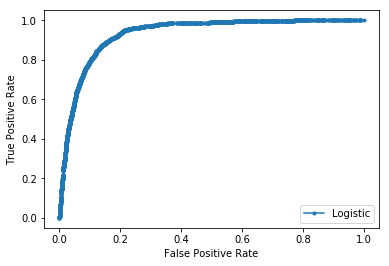

In [99]:

# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# calculate scores
auc = roc_auc_score(np.array(y_test), test_pred_prob[:, 1])

# summarize scores

print('Logistic: ROC AUC=%.3f' % (auc))

# calculate roc curves

fpr, tpr, _ = roc_curve(np.array(y_test), test_pred_prob[:, 1])
# plot the roc curve for the model

pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
